## Full Points: Working code that yields correct results

You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown:

- Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
- Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
- Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
- Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
- Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
- Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
- Question 7 - Sharing your Assignment Notebook - 2 Points

For each problem points will be awarded as follows:

Full Points: Working code that yields correct results
Partial Points: Partially correct code or results
No Points: Did not attempt the problem or did not upload any solution

- Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [73]:
import yfinance as yf  # Import library

# Download Tesla stock data
tesla_data = yf.download("TSLA")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


- Question 2: Extracting Tesla Revenue Data Using Webscraping (1 Point)

In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.content
soup = BeautifulSoup(html_data,'html.parser')
tables = soup.find_all('table')

# Let's Assume that Tesla revenue data is in the first table
tesla_table = tables[0]

# Empty Dataframe 
tesla_revenue =  pd.DataFrame(columns=["Date","Revenue"])

# Also must do a row empty list for new rows
rows = []

# loop: this get the table
for row in tesla_table.find_all('tr')[1:]: 
    cols = row.find_all('td')
    date = cols[0].text.strip() 
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Clean the revenue string
    rows.append({"Date": date, "Revenue": float(revenue)})

# Create a DataFrame
tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame(rows)], ignore_index=True)
# Display THE LAST 5 ROWS
tesla_revenue.tail()


C:\Users\User\AppData\Local\Temp\ipykernel_13660\1510431345.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame(rows)], ignore_index=True)


,Date,Revenue
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


- Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [75]:
import yfinance as yf # import library

# Download data 
gme_data = yf.download("GME")

# Reset the index
gme_data.reset_index(inplace=True)

# Show the gme_data
gme_data.head()


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691667,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683251,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


- Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points


In [76]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://finance.yahoo.com/quote/GME/history/" # I had to look for the link on Google
response = requests.get(url)
html_data = response.content
soup = BeautifulSoup(html_data,'html.parser')
tables = soup.find_all('table')

# Let's Assume that gamestop revenue data is in the first table
gamestop_table = tables[0]

# Empty Dataframe 
gme_revenue =  pd.DataFrame(columns=["Date","Revenue"])

# Also must do a row empty list for new rows
rows = []

# loop: this get the table
for row in gamestop_table.find_all('tr')[1:]: 
    cols = row.find_all('td')
    date = cols[0].text.strip() 
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Clean the revenue string
    rows.append({"Date": date, "Revenue": float(revenue)})

# Create a DataFrame
gme_revenue = pd.concat([tesla_revenue, pd.DataFrame(rows)], ignore_index=True)
# Display using .tail()
gme_revenue.tail()


,Date,Revenue
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


- Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

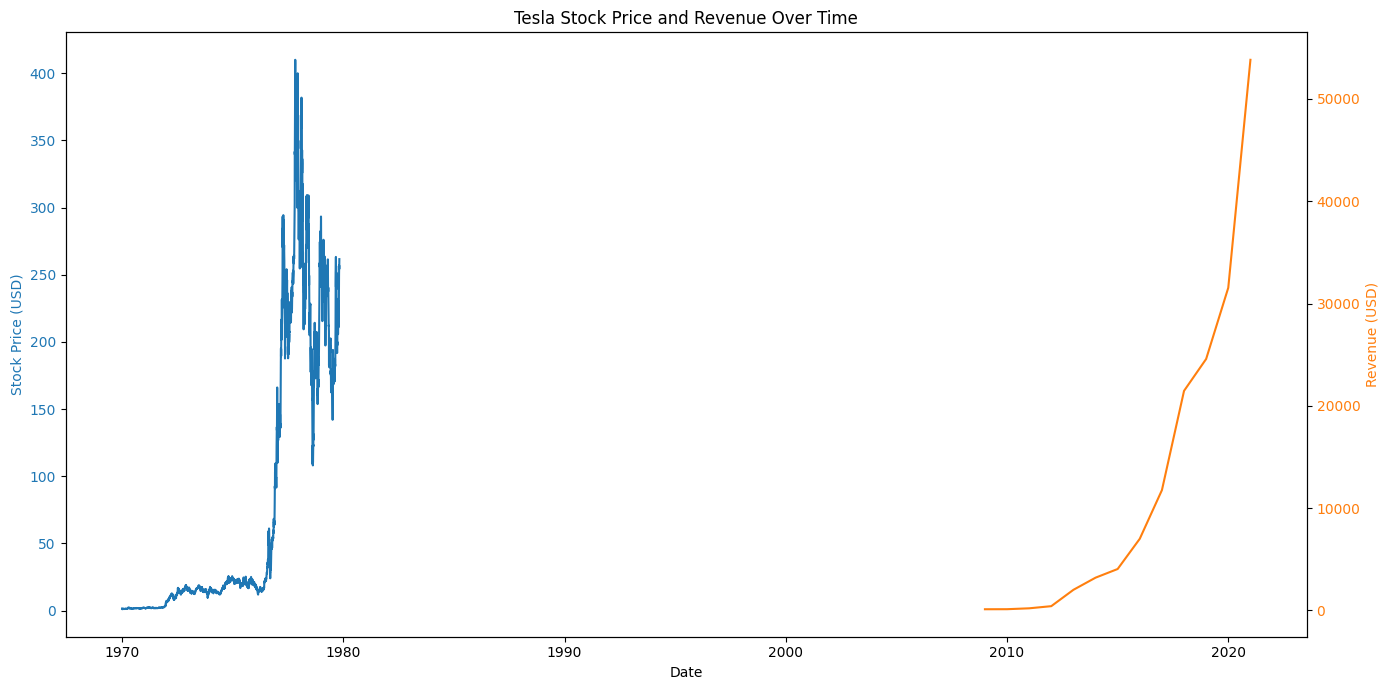

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrames (assuming they are already populated)
# tesla_data, tesla_revenue

# Convert 'Date' column to datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

def make_graph(tesla_data, tesla_revenue):
    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plotting Tesla stock price
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.plot(tesla_data.index, tesla_data['Close'], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Revenue (USD)', color='tab:orange')  
    ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='tab:orange', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Title and layout
    plt.title('Tesla Stock Price and Revenue Over Time')
    fig.tight_layout()  
    plt.show()

# Call the function to make the graph
make_graph(tesla_data, tesla_revenue)


- Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

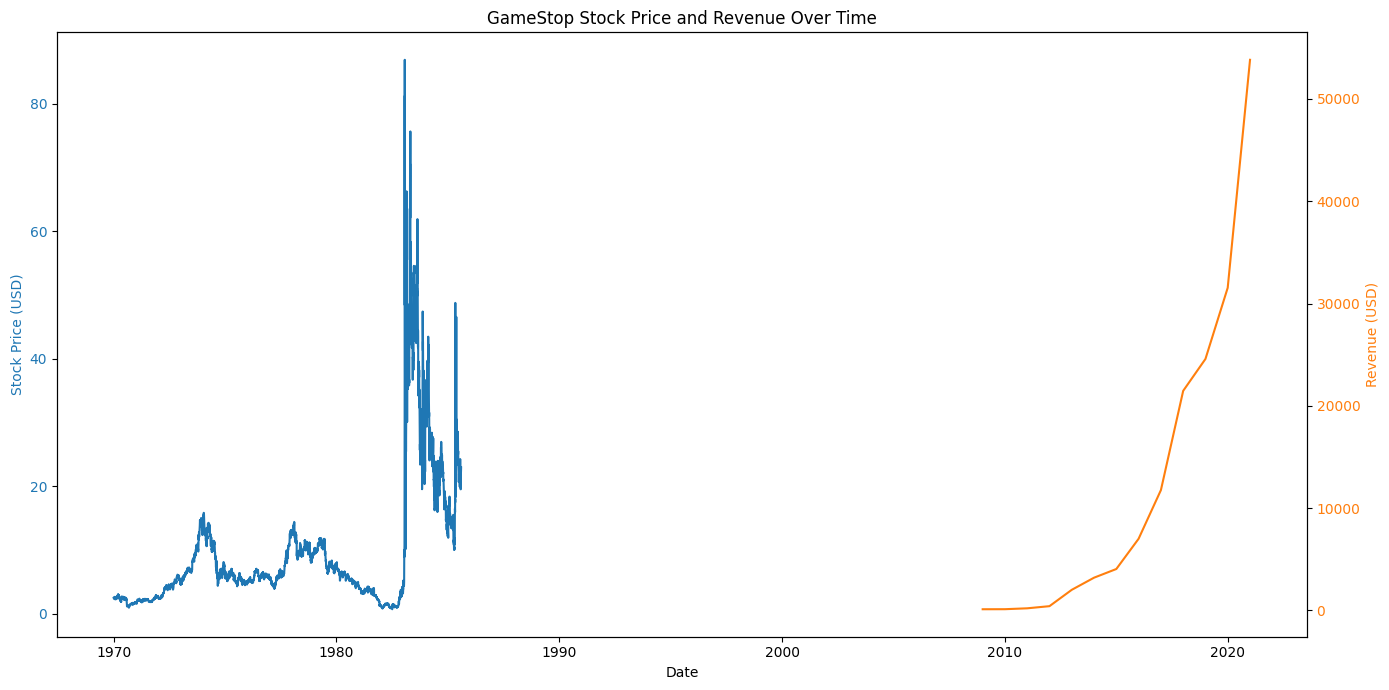

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrames (assuming they are already populated)
# gme_data, gme_revenue

# Convert 'Date' column to datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

def make_graph(gme_data, gme_revenue):
    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plotting GameStop stock price
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.plot(gme_data.index, gme_data['Close'], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Revenue (USD)', color='tab:orange')  
    ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='tab:orange', label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Title and layout
    plt.title('GameStop Stock Price and Revenue Over Time')
    fig.tight_layout()  
    plt.show()

# Call the function to make the graph
make_graph(gme_data, gme_revenue)


- Question 7 - Sharing your Assignment Notebook - 2 Points